In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the data to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten the images to 1D vectors
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Split a validation set from training data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42
)

## Model 1: Without Regularization

In [3]:
def build_model_without_regularization(input_dim=784, num_classes=10):
    model = Sequential([
        Dense(512, activation='relu', input_dim=input_dim),
        Dropout(0.2),
        Dense(256, activation='relu'),
        Dropout(0.2),
        Dense(num_classes, activation='softmax')
    ])
    return model

## Model 2: With L1 Regularization

In [4]:
def build_model_with_l1_regularization(input_dim=784, num_classes=10, l1_rate=0.001):
    model = Sequential([
        Dense(512, activation='relu', input_dim=input_dim, kernel_regularizer=l1(l1_rate)),
        Dropout(0.2),
        Dense(256, activation='relu', kernel_regularizer=l1(l1_rate)),
        Dropout(0.2),
        Dense(num_classes, activation='softmax')
    ])
    return model

## Model 3: With L2 Regularization

In [5]:
def build_model_with_l2_regularization(input_dim=784, num_classes=10, l2_rate=0.001):
    model = Sequential([
        Dense(512, activation='relu', input_dim=input_dim, kernel_regularizer=l2(l2_rate)),
        Dropout(0.2),
        Dense(256, activation='relu', kernel_regularizer=l2(l2_rate)),
        Dropout(0.2),
        Dense(num_classes, activation='softmax')
    ])
    return model

## Compile and Train All Models

In [7]:
# Define Early Stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Compile Models
def compile_model(model):
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Build and compile all three models
model_without_reg = compile_model(build_model_without_regularization())
model_with_l1 = compile_model(build_model_with_l1_regularization())
model_with_l2 = compile_model(build_model_with_l2_regularization())

print("********************************************************Without Regularization traning start********************************************************")

# Train Models
history_without_reg = model_without_reg.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=128,
    callbacks=[early_stopping],
    verbose=2
)
print("********************************************************Without Regularization traning end********************************************************")

print("********************************************************With L1 Regularization traning start********************************************************")
history_with_l1 = model_with_l1.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=128,
    callbacks=[early_stopping],
    verbose=2
)
print("********************************************************With L1 Regularization traning end********************************************************")

print("********************************************************With L2 Regularization traning start********************************************************")
history_with_l2 = model_with_l2.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=15,
    batch_size=128,
    callbacks=[early_stopping],
    verbose=2
)
print("********************************************************With L2 Regularization traning end********************************************************")

********************************************************Without Regularization traning start********************************************************
Epoch 1/15
422/422 - 8s - 18ms/step - accuracy: 0.9148 - loss: 0.2815 - val_accuracy: 0.9702 - val_loss: 0.1056
Epoch 2/15
422/422 - 8s - 18ms/step - accuracy: 0.9652 - loss: 0.1127 - val_accuracy: 0.9752 - val_loss: 0.0818
Epoch 3/15
422/422 - 6s - 15ms/step - accuracy: 0.9746 - loss: 0.0809 - val_accuracy: 0.9773 - val_loss: 0.0768
Epoch 4/15
422/422 - 10s - 24ms/step - accuracy: 0.9789 - loss: 0.0631 - val_accuracy: 0.9783 - val_loss: 0.0713
Epoch 5/15
422/422 - 7s - 17ms/step - accuracy: 0.9838 - loss: 0.0498 - val_accuracy: 0.9822 - val_loss: 0.0578
Epoch 6/15
422/422 - 9s - 21ms/step - accuracy: 0.9873 - loss: 0.0394 - val_accuracy: 0.9803 - val_loss: 0.0656
Epoch 7/15
422/422 - 11s - 26ms/step - accuracy: 0.9880 - loss: 0.0359 - val_accuracy: 0.9838 - val_loss: 0.0604
Epoch 8/15
422/422 - 11s - 25ms/step - accuracy: 0.9893 - loss: 0

## Plot Training and Validation Metrics for Comparison

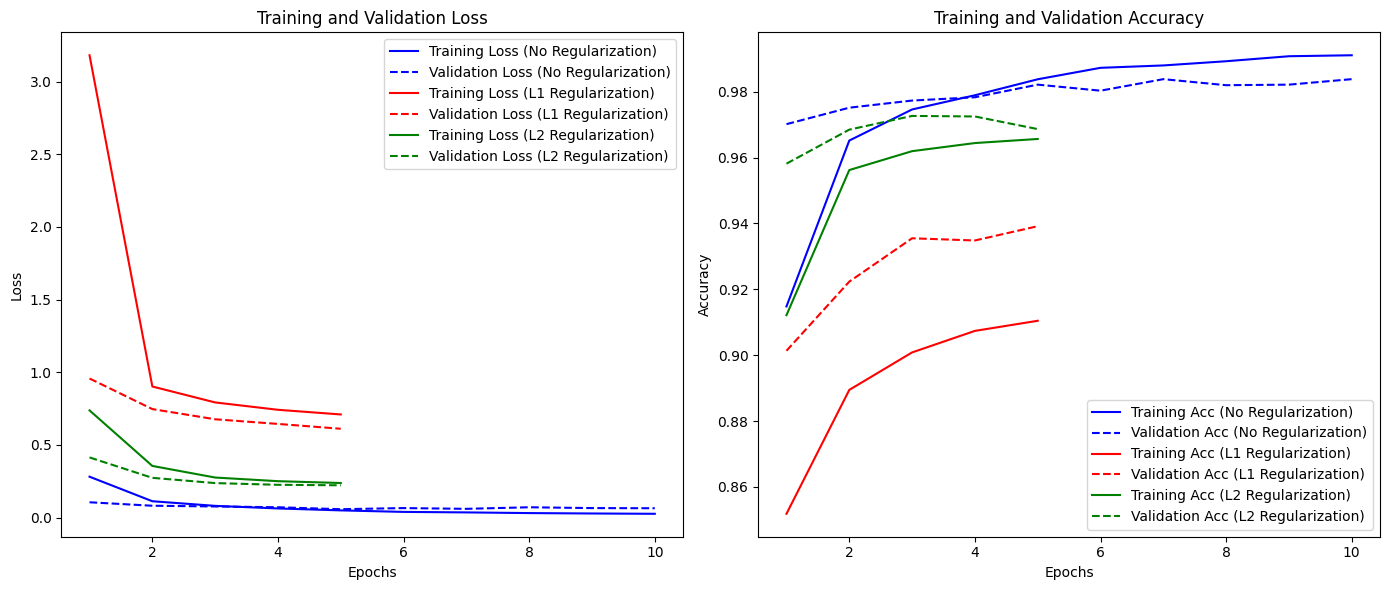

In [8]:
# Function to plot metrics
def plot_metrics(history1, history2, history3, title1, title2, title3):
    epochs1 = range(1, len(history1.history['loss']) + 1)
    epochs2 = range(1, len(history2.history['loss']) + 1)
    epochs3 = range(1, len(history3.history['loss']) + 1)

    plt.figure(figsize=(14, 6))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs1, history1.history['loss'], 'b-', label=f'Training Loss ({title1})')
    plt.plot(epochs1, history1.history['val_loss'], 'b--', label=f'Validation Loss ({title1})')

    plt.plot(epochs2, history2.history['loss'], 'r-', label=f'Training Loss ({title2})')
    plt.plot(epochs2, history2.history['val_loss'], 'r--', label=f'Validation Loss ({title2})')

    plt.plot(epochs3, history3.history['loss'], 'g-', label=f'Training Loss ({title3})')
    plt.plot(epochs3, history3.history['val_loss'], 'g--', label=f'Validation Loss ({title3})')

    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs1, history1.history['accuracy'], 'b-', label=f'Training Acc ({title1})')
    plt.plot(epochs1, history1.history['val_accuracy'], 'b--', label=f'Validation Acc ({title1})')

    plt.plot(epochs2, history2.history['accuracy'], 'r-', label=f'Training Acc ({title2})')
    plt.plot(epochs2, history2.history['val_accuracy'], 'r--', label=f'Validation Acc ({title2})')

    plt.plot(epochs3, history3.history['accuracy'], 'g-', label=f'Training Acc ({title3})')
    plt.plot(epochs3, history3.history['val_accuracy'], 'g--', label=f'Validation Acc ({title3})')

    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot the metrics
plot_metrics(
    history_without_reg,
    history_with_l1,
    history_with_l2,
    'No Regularization',
    'L1 Regularization',
    'L2 Regularization'
)

## Evaluate All Models on the Test Set

In [9]:
# Evaluate Models on Test Data
test_loss_no_reg, test_acc_no_reg = model_without_reg.evaluate(X_test, y_test, verbose=0)
test_loss_l1, test_acc_l1 = model_with_l1.evaluate(X_test, y_test, verbose=0)
test_loss_l2, test_acc_l2 = model_with_l2.evaluate(X_test, y_test, verbose=0)

print(f"Test Accuracy without Regularization: {test_acc_no_reg:.4f}, Test Loss: {test_loss_no_reg:.4f}")
print(f"Test Accuracy with L1 Regularization: {test_acc_l1:.4f}, Test Loss: {test_loss_l1:.4f}")
print(f"Test Accuracy with L2 Regularization: {test_acc_l2:.4f}, Test Loss: {test_loss_l2:.4f}")

Test Accuracy without Regularization: 0.9805, Test Loss: 0.0603
Test Accuracy with L1 Regularization: 0.9049, Test Loss: 0.9440
Test Accuracy with L2 Regularization: 0.9567, Test Loss: 0.4150
